http://boevalab.inf.ethz.ch/FREEC/tutorial.html#Example

In [21]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [8]:
%%bash
### select one chromosome in wig files

cd ~/source/bySpecies/danRer11_2/fasta/
grep_one_chr(){
    fi=$1
    chr_num=$2
    case $chr_num in
        1)
            next_chr_num=10
            ;;
        19)
            next_chr_num=2
            ;;
        2)
            next_chr_num=20
            ;;
        25)
            next_chr_num=3
            ;;
        9)
            next_chr_num=M
            ;;
        *)
            next_chr_num=`bc <<< "${chr_num} +1"`
            ;;
    esac
    
    start_row=$(grep -n chr${chr_num}'$' ${fi} | cut -f 1 -d ':')
    end_row_plus1=$(grep -n chr${next_chr_num}'$' ${fi} | cut -f 1 -d ':')
    
    head_num=`bc <<< "${end_row_plus1} -1"`
    head -${head_num} ${fi} | tail -n+${start_row} > chr${chr_num}.fasta
    echo $end_row_plus1
    echo $start_row
}

for chr_num in $(seq 25);do
    echo $chr_num
    grep_one_chr danRer11_2_main.fa $chr_num
done


1
1191568
1
2
12407923
11215109
3
18983844
17731273
4
20473822
18983844
5
21923831
20473822
6
23129234
21923831
7
24614883
23129234
8
25700978
24614883
9
26830176
25700978
10
2099987
1191568
11
3009685
2099987
12
3993346
3009685
13
5037068
3993346
14
6090274
5037068
15
7051087
6090274
16
8156418
7051087
17
9225641
8156418
18
10246112
9225641
19
11215109
10246112
20
13511951
12407923
21
14430634
13511951
22
15213297
14430634
23
16137770
15213297
24
16981230
16137770
25
17731273
16981230


In [10]:
%%bash
cd ~/source/bySpecies/danRer11_2/fasta
grep -n chrM danRer11_2_main.fa
tail -n+26830176 danRer11_2_main.fa > chrM.fasta

26830176:>chrM


In [11]:
%%bash
cd ~/maternal_loading/1.private_data/20221209_WGS/analysis/freec_CNV

# freec -conf /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/bin/make5_freec_CNV/make5_freec_CNV.config_WGS.txt -sample /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/1_mapping/Npm2a-1k-2N_20221209.sorted.bam -control /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/1_mapping/Npm2a-1k-4N_20221209.sorted.bam

freec_run(){
    sample=$1
    freec -conf /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/bin/make5_freec_CNV/make5_freec_CNV.config_WGS.txt -sample /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/1_mapping/${sample}.sorted.bam
    
}
freec_run Npm2a-1k-2N_20221209
freec_run Npm2a-1k-2N_20221216
freec_run Npm2a-1k-4N_20221209
freec_run Npm2a-1k-4N_20221216
freec_run Npm2a-256-2N_20221209
freec_run Npm2a-256-2N_20221216
freec_run Npm2a-256-4N_20221209
freec_run Npm2a-256-4N_20221216
freec_run Npm2a-4-5h-1-2N_20221216
freec_run Npm2a-4-5h-1-4N_20221216
freec_run Npm2a-4-5h-2-2N_20221216
freec_run Npm2a-4-5h-2-4N_20221216
freec_run Npm2a-4-5h-2N_20221209
freec_run Npm2a-4-5h-4N_20221209
freec_run Npm2a-5-5h-1-2N_20221209
freec_run Npm2a-5-5h-1-4N_20221209
freec_run Npm2a-5-5h-2-2N_20221209
freec_run Npm2a-5-5h-2-4N_20221209

Control-FREEC v11.6 : a method for automatic detection of copy number alterations, subclones and for accurate estimation of contamination and main ploidy using deep-sequencing data
Non Multi-threading mode
..Breakpoint threshold for segmentation of copy number profiles is 0.6
..telocenromeric set to 50000
..FREEC is going to adjust profiles for a possible contamination by normal cells
..set contaminationAdjustment=FALSE if you don't want to use this option because you think that there is no contamiantion of your tumor sample by normal cells (e.g., it is a cell line, or it non-cancer DNA used without a control sample)
..Contamination by normal cells set to:	20%
..Note, the Coefficient Of Variation won't be used since "window" = 200000 was set
..Step:	10000
..Output directory:	/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis/freec_CNV
..Directory with files containing chromosome sequences:	/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/fasta/
..S

..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM
..failed to run segmentation on chrM


In [17]:
%%bash

### plot

cd ~/maternal_loading/1.private_data/20221209_WGS/analysis/freec_CNV
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-1k-2N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-1k-2N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-1k-4N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-1k-4N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-256-2N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-256-2N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-256-4N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-256-4N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-4-5h-1-2N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-4-5h-1-4N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-4-5h-2-2N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-4-5h-2-4N_20221216.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-4-5h-2N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-4-5h-4N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-5-5h-1-2N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-5-5h-1-4N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-5-5h-2-2N_20221209.sorted.bam_ratio.txt
cat /mnt/Storage/home/wangyiman/software/FREEC/scripts/makeGraph2.0.R | R --slave --args Npm2a-5-5h-2-4N_20221209.sorted.bam_ratio.txt

INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 
INFO: Selected ploidy: 2 
null device 
          1 


# split gain / loss regions

In [57]:
%%bash
split_CNV(){
    cd ~/maternal_loading/1.private_data/20221209_WGS/analysis/freec_CNV
    name=$1
    t=$2
    N1=${name%%_*}
    N=${N1##*-}
    cnv_fi=${name}.sorted.bam_CNVs
    bedtools merge -i $cnv_fi -c 5 -o distinct | grep $'\t'${t}'$' | cut -f 1-3 | bedtools merge -i - > CNV_${N}_${t}/${cnv_fi}.CNV_${t}.bed
}

split_CNV Npm2a-1k-2N_20221209 loss
split_CNV Npm2a-1k-2N_20221216 loss
split_CNV Npm2a-256-2N_20221209 loss
split_CNV Npm2a-256-2N_20221216 loss
split_CNV Npm2a-4-5h-1-2N_20221216 loss
split_CNV Npm2a-4-5h-2-2N_20221216 loss
split_CNV Npm2a-4-5h-2N_20221209 loss
split_CNV Npm2a-5-5h-1-2N_20221209 loss
split_CNV Npm2a-5-5h-2-2N_20221209 loss

split_CNV Npm2a-1k-4N_20221209 gain
split_CNV Npm2a-1k-4N_20221216 gain
split_CNV Npm2a-256-4N_20221209 gain
split_CNV Npm2a-256-4N_20221216 gain
split_CNV Npm2a-4-5h-1-4N_20221216 gain
split_CNV Npm2a-4-5h-2-4N_20221216 gain
split_CNV Npm2a-4-5h-4N_20221209 gain
split_CNV Npm2a-5-5h-1-4N_20221209 gain
split_CNV Npm2a-5-5h-2-4N_20221209 gain
    
split_CNV Npm2a-1k-2N_20221209 gain
split_CNV Npm2a-1k-2N_20221216 gain
split_CNV Npm2a-256-2N_20221209 gain
split_CNV Npm2a-256-2N_20221216 gain
split_CNV Npm2a-4-5h-1-2N_20221216 gain
split_CNV Npm2a-4-5h-2-2N_20221216 gain
split_CNV Npm2a-4-5h-2N_20221209 gain
split_CNV Npm2a-5-5h-1-2N_20221209 gain
split_CNV Npm2a-5-5h-2-2N_20221209 gain

split_CNV Npm2a-1k-4N_20221209 loss
split_CNV Npm2a-1k-4N_20221216 loss
split_CNV Npm2a-256-4N_20221209 loss
split_CNV Npm2a-256-4N_20221216 loss
split_CNV Npm2a-4-5h-1-4N_20221216 loss
split_CNV Npm2a-4-5h-2-4N_20221216 loss
split_CNV Npm2a-4-5h-4N_20221209 loss
split_CNV Npm2a-5-5h-1-4N_20221209 loss
split_CNV Npm2a-5-5h-2-4N_20221209 loss


# length distribution

In [22]:
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis/freec_CNV/')
name_list = [
    'Npm2a-1k-2N_20221209',
    'Npm2a-1k-2N_20221216',
    'Npm2a-1k-4N_20221209',
    'Npm2a-1k-4N_20221216',
    'Npm2a-256-2N_20221209',
    'Npm2a-256-2N_20221216',
    'Npm2a-256-4N_20221209',
    'Npm2a-256-4N_20221216',
    'Npm2a-4-5h-1-2N_20221216',
    'Npm2a-4-5h-1-4N_20221216',
    'Npm2a-4-5h-2-2N_20221216',
    'Npm2a-4-5h-2-4N_20221216',
    'Npm2a-4-5h-2N_20221209',
    'Npm2a-4-5h-4N_20221209',
    'Npm2a-5-5h-1-2N_20221209',
    'Npm2a-5-5h-1-4N_20221209',
    'Npm2a-5-5h-2-2N_20221209',
    'Npm2a-5-5h-2-4N_20221209',
]

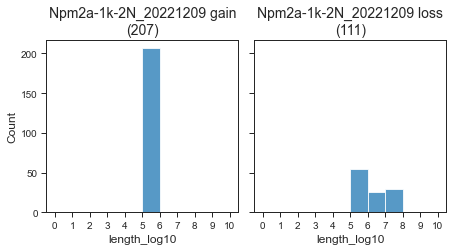

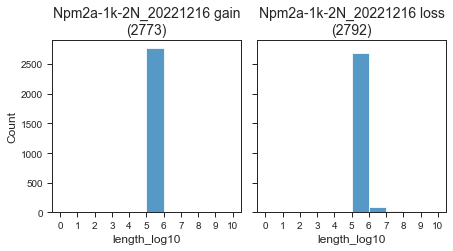

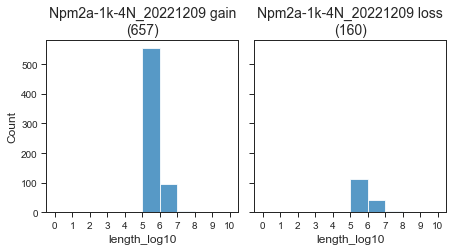

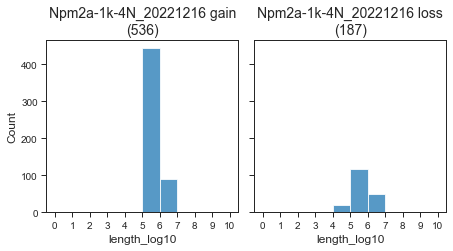

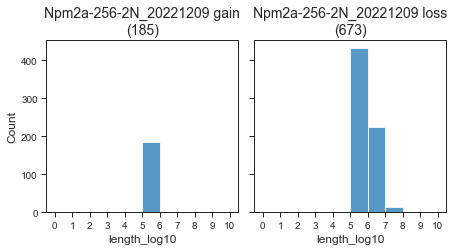

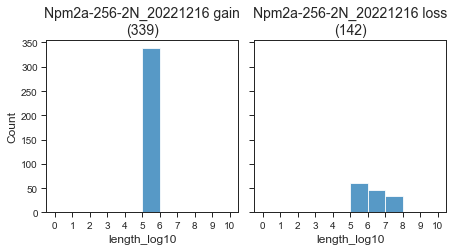

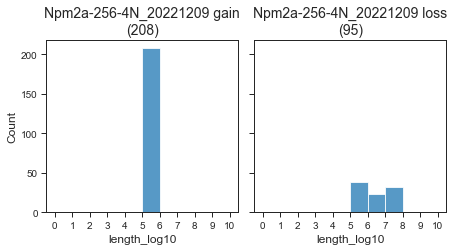

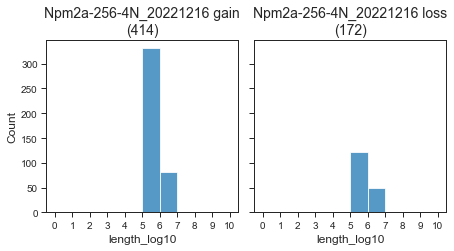

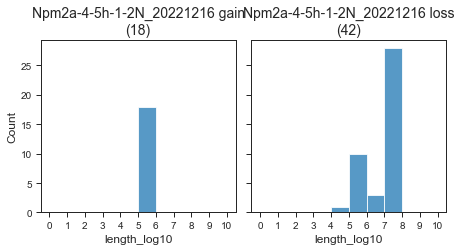

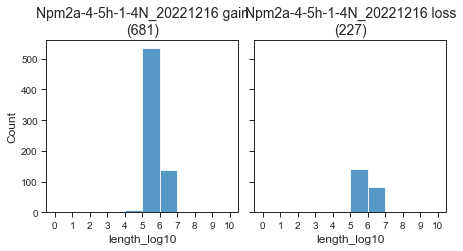

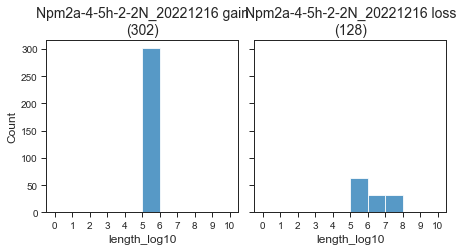

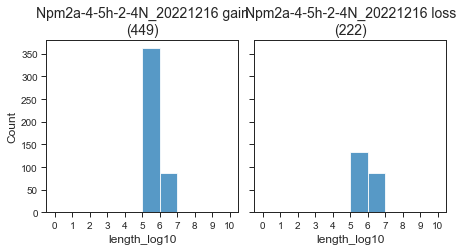

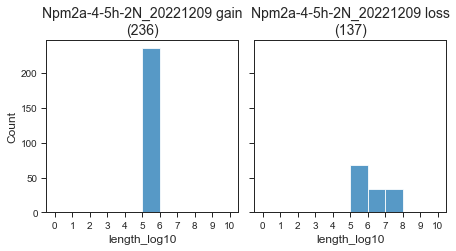

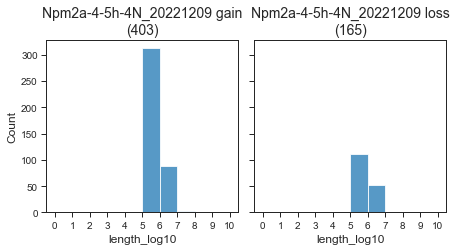

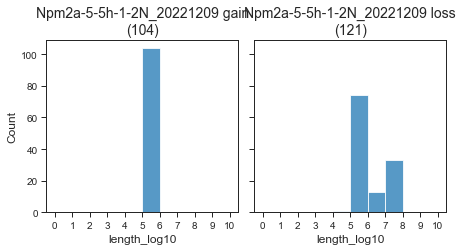

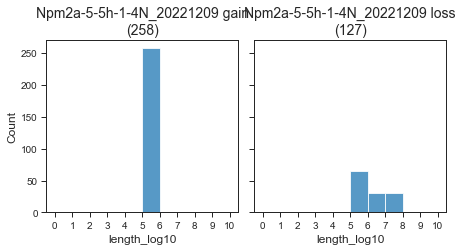

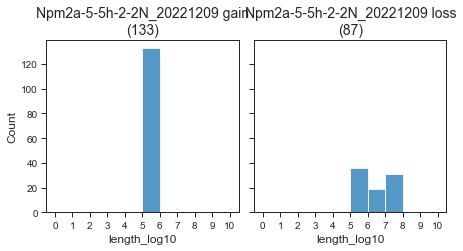

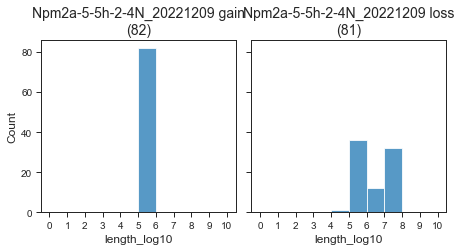

In [40]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for name in name_list :
        fig, axes = plt.subplots(1,2,figsize = (6.4, 4.8 * .75), tight_layout = True, sharey = True)
        df_shape = []
        for i,t in enumerate(['gain', 'loss']) :
            ax = axes[i]
            N = name.split('_')[0].split('-')[-1]
            df = pd.read_csv(
                f'CNV_{N}_{t}/{name}.sorted.bam_CNVs.CNV_{t}.bed', sep = "\t", header = None,
            )
            df['length'] = df[2] - df[1]
            df['length_log10'] = np.log10(df['length'])
            sns.histplot(
                data = df,
                x = 'length_log10',
                ax = ax,
                binwidth = 1,
                binrange = [0, 10]
            )
            ax.set_title(f'{name} {t}\n({df.shape[0]})')
            df_shape.append(df.shape[0])
            ax.set_xticks(range(11))
                   

# total length

In [60]:
df

,0,1,2,length
0,1,0,59578282,59578282
1,10,0,45420867,45420867
2,11,0,45484837,45484837
3,13,0,52186027,52186027
4,14,0,52660232,52660232
5,19,0,48449771,48449771
6,21,0,45934066,45934066
7,22,0,39133080,39133080
8,25,0,37502051,37502051
9,3,0,62628489,62628489


In [63]:
total_len = pd.DataFrame()
N_ls = []
type_ls = []
total_len_ls = []
name_double_ls = []

for name in name_list :
    df_shape = []
    for i,t in enumerate(['gain', 'loss']) :
        N = name.split('_')[0].split('-')[-1]
        try :
            df = pd.read_csv(
                f'CNV_{N}_{t}/{name}.sorted.bam_CNVs.CNV_{t}.bed', sep = "\t", header = None,
            )
            df['length'] = df[2] - df[1]
            total_len_ls.append(df['length'].sum())
#             print(1)
        except :
            total_len_ls.append(0)
            
        N_ls.append(N)
        type_ls.append(t)
        name_double_ls.append(name)            

        
total_len['N'] = N_ls
total_len['Type'] = type_ls
total_len['total_len'] = total_len_ls
total_len['name'] = name_double_ls

total_len['stage'] = [f'{x} cell' if x not in ['4', '5'] else f'{x}.5 hpf' for x in total_len['name'].str.split('-', expand = True)[1]]
total_len

,N,Type,total_len,name,stage
0,2N,gain,0,Npm2a-1k-2N_20221209,1k cell
1,2N,loss,799392040,Npm2a-1k-2N_20221209,1k cell
2,2N,gain,0,Npm2a-1k-2N_20221216,1k cell
3,2N,loss,713874865,Npm2a-1k-2N_20221216,1k cell
4,4N,gain,371699797,Npm2a-1k-4N_20221209,1k cell
5,4N,loss,164004807,Npm2a-1k-4N_20221209,1k cell
6,4N,gain,309019770,Npm2a-1k-4N_20221216,1k cell
7,4N,loss,128885575,Npm2a-1k-4N_20221216,1k cell
8,2N,gain,0,Npm2a-256-2N_20221209,256 cell
9,2N,loss,605389735,Npm2a-256-2N_20221209,256 cell


In [56]:
12322791 + 1341423543

1353746334

In [49]:
chrom_size_df = pd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/chromSizes/danRer11_2_main.chrom.sizes', sep = "\t", header = None)
chrom_size_df[1].sum()

1341523546

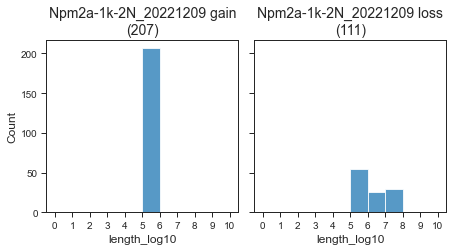

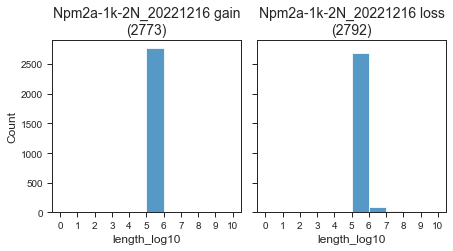

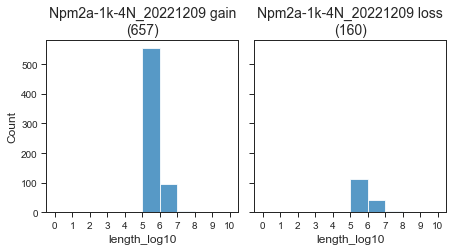

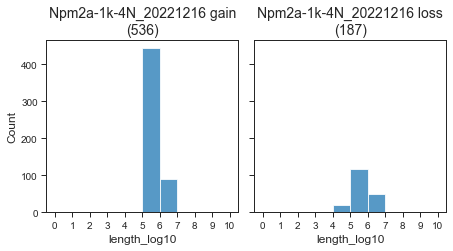

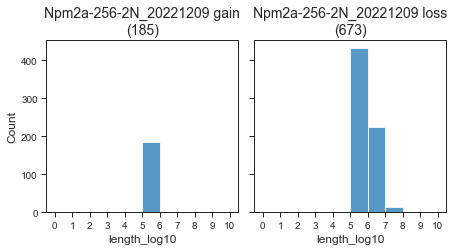

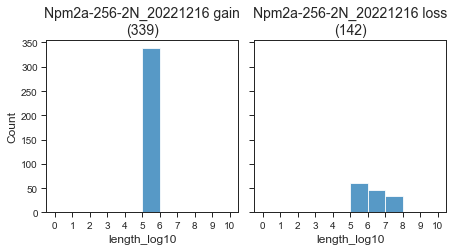

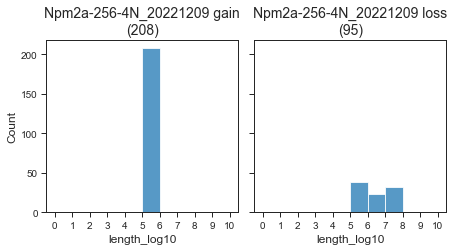

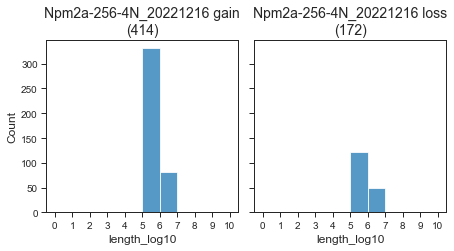

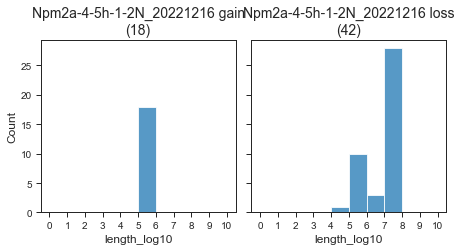

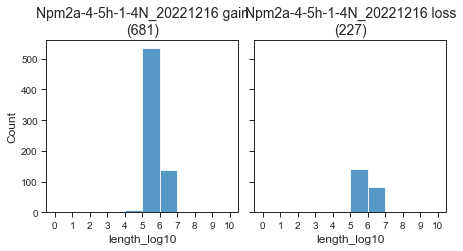

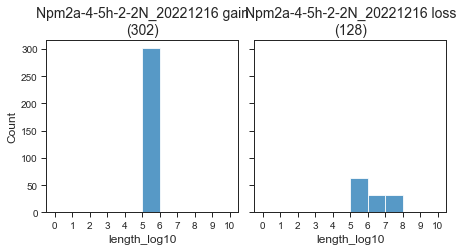

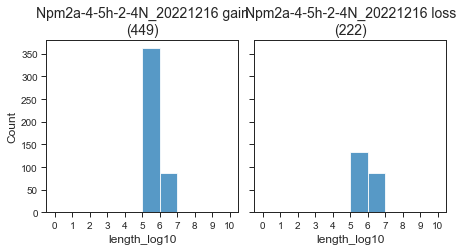

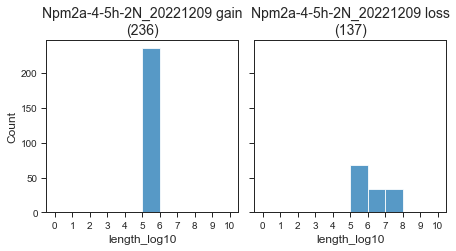

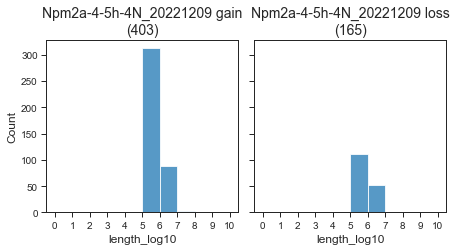

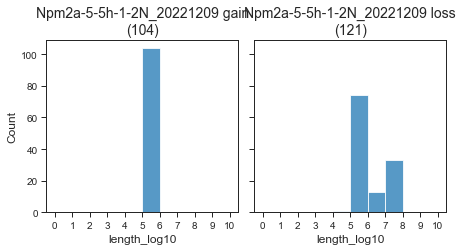

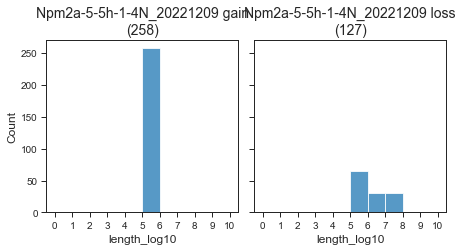

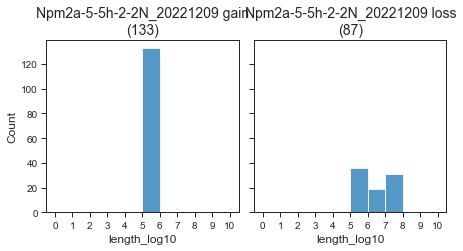

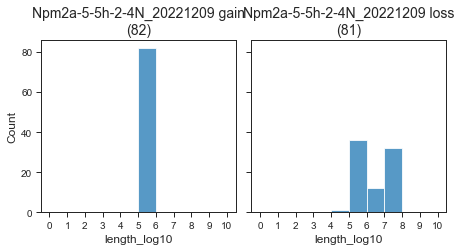

In [40]:
# total length
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for name in name_list :
        fig, axes = plt.subplots(1,2,figsize = (6.4, 4.8 * .75), tight_layout = True, sharey = True)
        df_shape = []
        for i,t in enumerate(['gain', 'loss']) :
            ax = axes[i]
            N = name.split('_')[0].split('-')[-1]
            df = pd.read_csv(
                f'CNV_{N}_{t}/{name}.sorted.bam_CNVs.CNV_{t}.bed', sep = "\t", header = None,
            )
            df['length'] = df[2] - df[1]
            df['length_log10'] = np.log10(df['length'])
            sns.histplot(
                data = df,
                x = 'length_log10',
                ax = ax,
                binwidth = 1,
                binrange = [0, 10]
            )
            ax.set_title(f'{name} {t}\n({df.shape[0]})')
            df_shape.append(df.shape[0])
            ax.set_xticks(range(11))
                   